In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_auc_score

data = pd.read_csv('data/classification.csv', sep=',')

In [2]:
expected = data['true']
predicted = data['pred']
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.52      0.65      0.58        98
          1       0.56      0.42      0.48       102

avg / total       0.54      0.54      0.53       200

[[64 34]
 [59 43]]


In [3]:
fp, tp, th = metrics.roc_curve(expected, predicted)
roc_auc = metrics.auc(fp, tp)
print(fp, tp, roc_auc)

[ 0.          0.34693878  1.        ] [ 0.          0.42156863  1.        ] 0.53731492597


In [4]:
print(metrics.accuracy_score(expected, predicted))

0.535


In [5]:
print(metrics.precision_score(expected, predicted))

0.558441558442


In [6]:
print(metrics.recall_score(expected, predicted))

0.421568627451


In [7]:
print(metrics.f1_score(expected, predicted))

0.480446927374


In [9]:
data_scores = pd.read_csv('data/scores.csv')
data_scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [10]:
feature_mapping = data_scores.columns[1:5]
print(feature_mapping)

Index(['score_logreg', 'score_svm', 'score_knn', 'score_tree'], dtype='object')


In [11]:
y = data_scores['true']
X = data_scores.drop('true', axis=1)

In [13]:
n_samples, n_features = X.shape
print(n_samples, n_features)

200 4


In [14]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

In [15]:
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
y_true = data_scores['true']

for i, feat in enumerate(feature_mapping):
    roc_auc[i] = metrics.roc_auc_score(y_true, X[feat])
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_true, X[feat])
    average_precision[i] = metrics.average_precision_score(y_true, X[feat])
    print("%13s AUC_ROC: %.3f" % (feat, roc_auc[i]))

 score_logreg AUC_ROC: 0.719
    score_svm AUC_ROC: 0.709
    score_knn AUC_ROC: 0.635
   score_tree AUC_ROC: 0.692


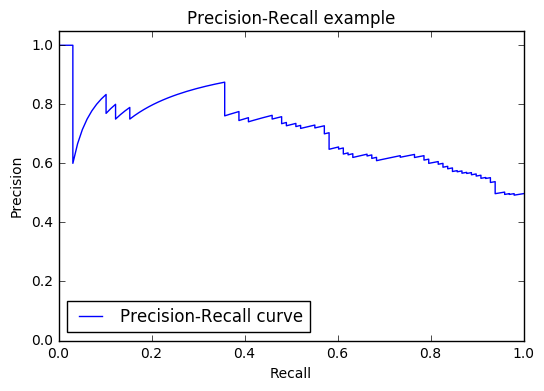

In [16]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example')
plt.legend(loc="lower left")
plt.show()

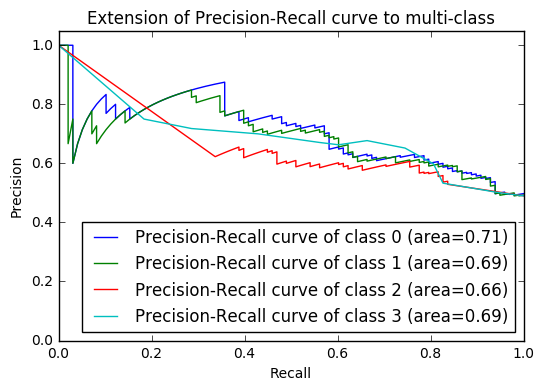

In [17]:
plt.clf()

for i in range(n_features):
    plt.plot(recall[i], precision[i],
             label='Precision-Recall curve of class {0} (area={1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()